# 1) Train Set

### i) Importing Libraries

In [54]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sn

## ii) Data Preprocessing

In [4]:
df=pd.read_csv('/kaggle/input/test-kaggle-dataset/train.csv')

#### Dataset first five rows

In [5]:
df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000
1,1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250
2,2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000
3,3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500
4,4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850


#### Dataset shape

In [6]:
df.shape

(54273, 13)

#### Dataset information

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54273 entries, 0 to 54272
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            54273 non-null  int64 
 1   brand         54273 non-null  object
 2   model         54273 non-null  object
 3   model_year    54273 non-null  int64 
 4   milage        54273 non-null  int64 
 5   fuel_type     54273 non-null  object
 6   engine        54273 non-null  object
 7   transmission  54273 non-null  object
 8   ext_col       54273 non-null  object
 9   int_col       54273 non-null  object
 10  accident      54273 non-null  object
 11  clean_title   54273 non-null  object
 12  price         54273 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 5.4+ MB


#### Dataset null values

In [8]:
df.isnull().sum()

id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

#### Dataset duplicated values

In [9]:
df.duplicated().sum()

0

#### Dataset extra statistical measures

In [10]:
df.describe()

,id,model_year,milage,price
count,54273.000000,54273.000000,54273.000000,5.427300e+04
mean,27136.000000,2015.091979,72746.175667,3.921844e+04
std,15667.409917,5.588909,50469.490448,7.282634e+04
min,0.000000,1974.000000,100.000000,2.000000e+03
25%,13568.000000,2012.000000,32268.000000,1.550000e+04
50%,27136.000000,2016.000000,66107.000000,2.800000e+04
75%,40704.000000,2019.000000,102000.000000,4.500000e+04
max,54272.000000,2024.000000,405000.000000,2.954083e+06


#### Dataset unique values

In [11]:
df.nunique()

id              54273
brand              53
model            1827
model_year         34
milage           3212
fuel_type           7
engine           1061
transmission       46
ext_col           260
int_col           124
accident            2
clean_title         1
price            1481
dtype: int64

In [13]:
df['clean_title'].value_counts()

clean_title
Yes    54273
Name: count, dtype: int64

In [14]:
df.drop(columns=['id','clean_title','brand','model'], axis=1, inplace=True)

-----

## iii) Exploratory Data Analysis

### a) Visualizing the distributions

array([[<Axes: title={'center': 'model_year'}>,
        <Axes: title={'center': 'milage'}>],
       [<Axes: title={'center': 'price'}>, <Axes: >]], dtype=object)

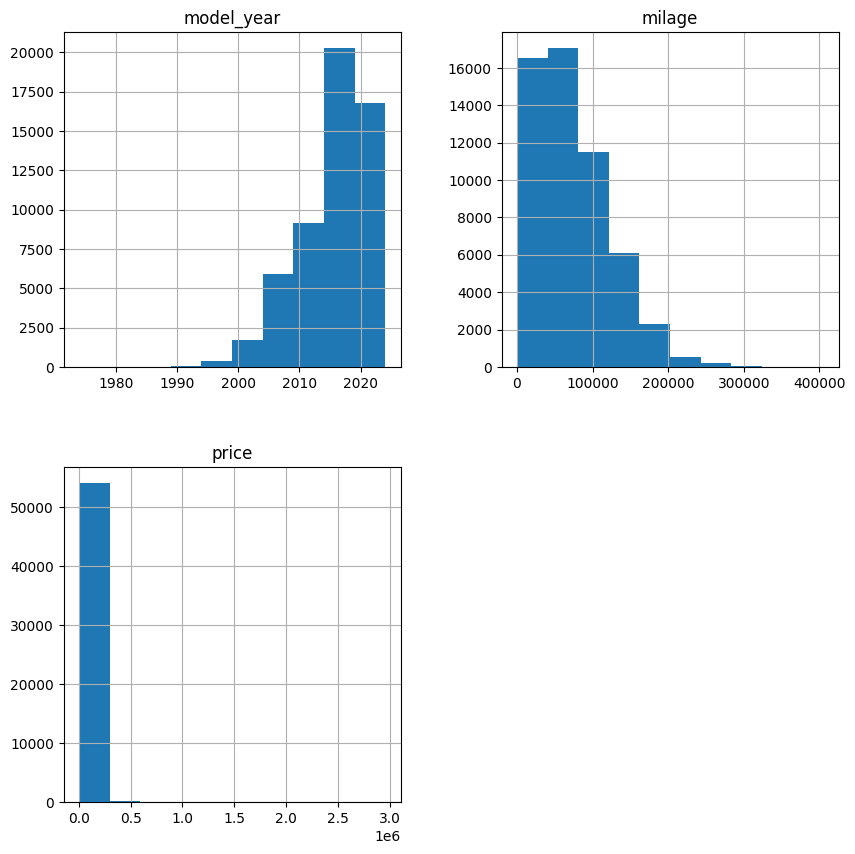

In [14]:
df.hist(figsize=(10,10))

### b) Labeled Column

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

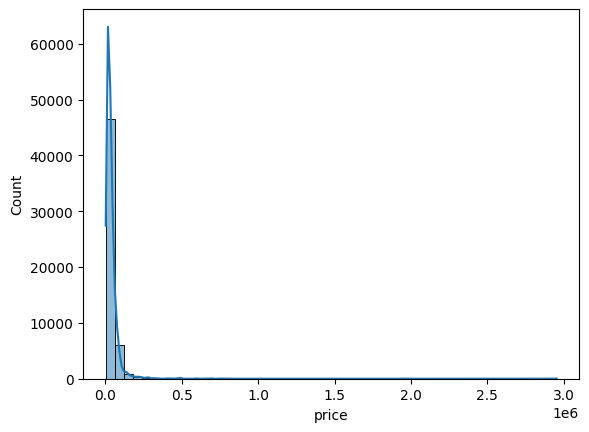

In [15]:
sn.histplot(x='price', data=df, kde=True, bins=50)

In [16]:
cat_cols=df.select_dtypes(include=['object']).columns

cat_cols

Index(['fuel_type', 'engine', 'transmission', 'ext_col', 'int_col',
       'accident'],
      dtype='object')

### c) Label Encoding

In [17]:
from sklearn.preprocessing import LabelEncoder

lb=LabelEncoder()

In [18]:
for col in cat_cols:
    df[col]=lb.fit_transform(df[col])

### d) Visualizing the corrleation

<Axes: >

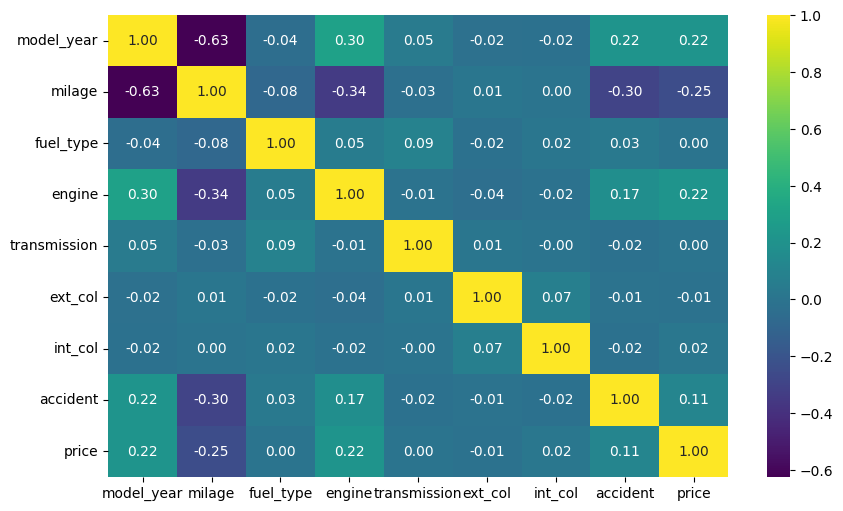

In [20]:
plt.figure(figsize=(10,6))
sn.heatmap(df.corr(), annot=True, fmt='.2f', cmap='viridis')

### e) Visualizing the correlation with respect to labeled column

<Axes: >

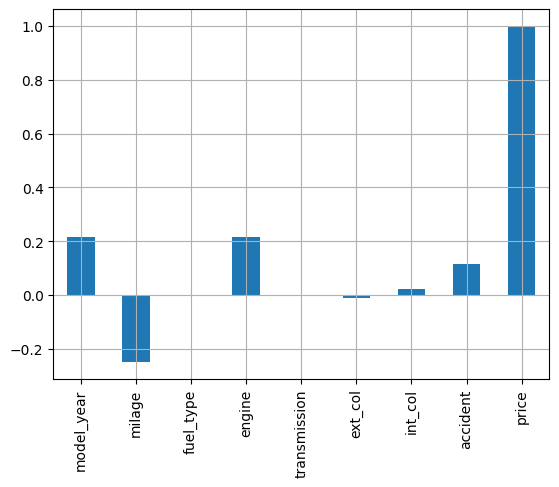

In [21]:
df.corr()['price'].plot(kind='bar',grid=True)

-----------

## iv) Train Test Split

In [20]:
X=df.drop('price',axis=1)
Y=df['price']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=101)

In [23]:
print(X.shape,X_train.shape,X_test.shape)

(54273, 8) (43418, 8) (10855, 8)


------

## v) Scaling the data

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
sc=StandardScaler()

In [26]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

---------

## vi) Model Training

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [28]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [29]:
def report(model):
    y_pred=model.predict(X_test)
    test_mae=mean_absolute_error(Y_test, y_pred)
    test_mse=mean_squared_error(Y_test, y_pred)
    test_r2=r2_score(Y_test, y_pred)
    
    y1_pred=model.predict(X_train)
    train_r2=r2_score(Y_train,y1_pred)
    
    print('Training Accuracy: ',train_r2)
    print('Testting Accuracy: ', test_r2)
    print('Mean Absolute Error: ', test_mae)
    print('Mean Squared Error: ',test_mse)

### 1) Linear Regression

In [32]:
tree=LinearRegression()
tree.fit(X_train,Y_train)

LinearRegression()

#### a) Metrices

In [33]:
report(tree)

Training Accuracy:  0.09034047085113817
Testting Accuracy:  0.07614726168303765
Mean Absolute Error:  19751.011008570193
Mean Squared Error:  5230363548.175711


### 2) Random Forest

In [30]:
rf=RandomForestRegressor()
rf.fit(X_train,Y_train)

RandomForestRegressor()

#### a) Metrcies

In [31]:
report(rf)

Training Accuracy:  0.8657727383845759
Testting Accuracy:  -0.10805699747641895
Mean Absolute Error:  19333.66430665482
Mean Squared Error:  6273230233.056158


#### b) Feature importances

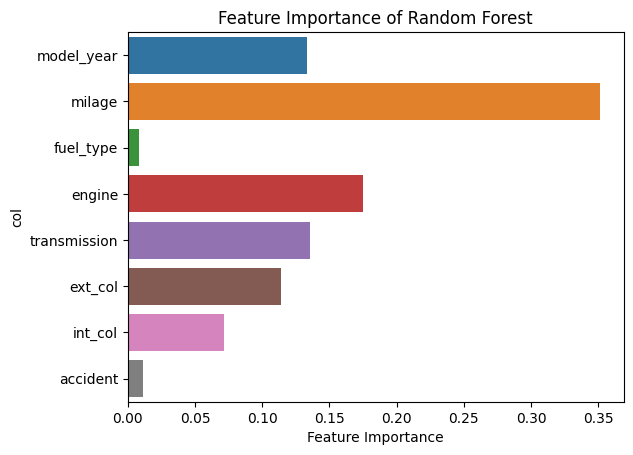

In [43]:
f_i=pd.DataFrame({'col': X.columns, 'Feature Importance': rf.feature_importances_})


sn.barplot(x='Feature Importance', y='col', data=f_i)
plt.title('Feature Importance of Random Forest')
plt.show()

### 3) Gradient Boosting

In [32]:
gr=GradientBoostingRegressor()
gr.fit(X_train,Y_train)

GradientBoostingRegressor()

#### a) Metrcies

In [33]:
report(gr)

Training Accuracy:  0.2395512649460001
Testting Accuracy:  0.08784440715864184
Mean Absolute Error:  17343.175450402803
Mean Squared Error:  5164140522.821297


#### b) Feature importances

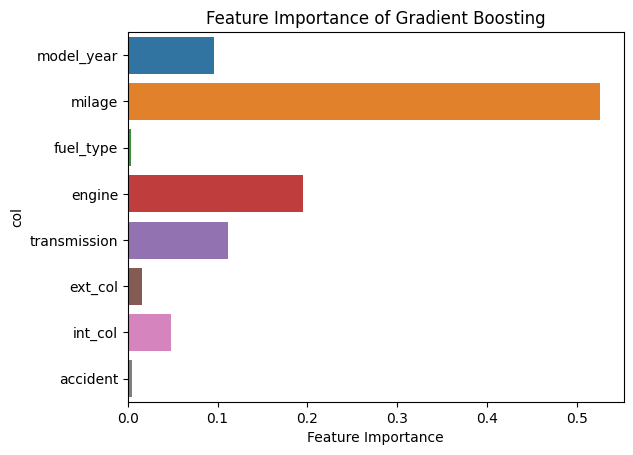

In [44]:
f_i=pd.DataFrame({'col': X.columns, 'Feature Importance': gr.feature_importances_})


sn.barplot(x='Feature Importance', y='col', data=f_i)
plt.title('Feature Importance of Gradient Boosting')
plt.show()

### 4) XGBoost

In [45]:
xg=XGBRegressor()
xg.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

#### a) Metrcies

In [46]:
report(xg)

Training Accuracy:  0.7179009796430013
Testting Accuracy:  -0.1531803699820058
Mean Absolute Error:  18802.800804396127
Mean Squared Error:  6528694803.25804


#### b) Feature importances

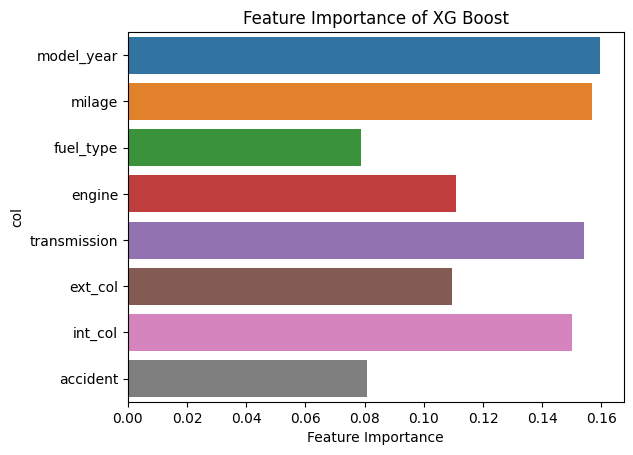

In [47]:
f_i=pd.DataFrame({'col': X.columns, 'Feature Importance': xg.feature_importances_})


sn.barplot(x='Feature Importance', y='col', data=f_i)
plt.title('Feature Importance of XG Boost')
plt.show()

### 5) Light Gradient Boosting

In [48]:
lg=LGBMRegressor()
lg.fit(X_train,Y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004253 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 869
[LightGBM] [Info] Number of data points in the train set: 43418, number of used features: 8
[LightGBM] [Info] Start training from score 39200.425630


LGBMRegressor()

#### a) Metrcies

In [49]:
report(lg)

Training Accuracy:  0.3303223895674773
Testting Accuracy:  0.07570455484058558
Mean Absolute Error:  17710.217879557196
Mean Squared Error:  5232869919.197036


#### b) Feature importances

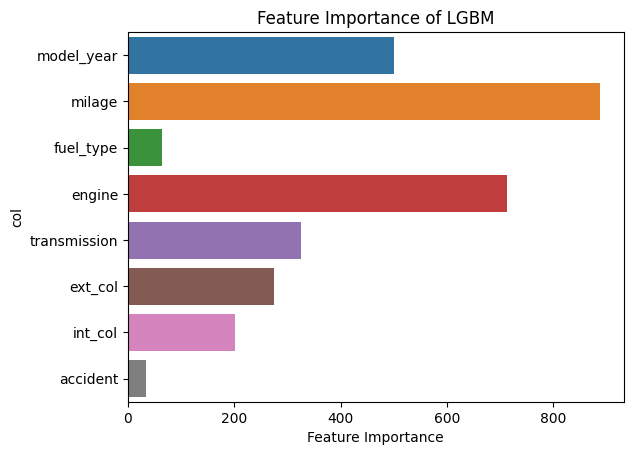

In [50]:
f_i=pd.DataFrame({'col': X.columns, 'Feature Importance': lg.feature_importances_})


sn.barplot(x='Feature Importance', y='col', data=f_i)
plt.title('Feature Importance of LGBM')
plt.show()

### 6) Catboost 

In [51]:
ct=CatBoostRegressor()
ct.fit(X_train,Y_train)

Learning rate set to 0.07429
0:	learn: 71658.1420056	total: 58.2ms	remaining: 58.2s
1:	learn: 71182.8542565	total: 62.6ms	remaining: 31.3s
2:	learn: 70778.9296061	total: 67.4ms	remaining: 22.4s
3:	learn: 70405.7829787	total: 72.2ms	remaining: 18s
4:	learn: 70084.3927723	total: 76.7ms	remaining: 15.3s
5:	learn: 69775.3470703	total: 81.8ms	remaining: 13.6s
6:	learn: 69449.4893612	total: 86.5ms	remaining: 12.3s
7:	learn: 69225.7779972	total: 91.1ms	remaining: 11.3s
8:	learn: 68966.6256912	total: 95.4ms	remaining: 10.5s
9:	learn: 68776.5314901	total: 99.9ms	remaining: 9.89s
10:	learn: 68615.2326216	total: 105ms	remaining: 9.41s
11:	learn: 68326.2162218	total: 109ms	remaining: 8.98s
12:	learn: 68181.8865844	total: 114ms	remaining: 8.65s
13:	learn: 68056.2806478	total: 118ms	remaining: 8.34s
14:	learn: 67930.2002883	total: 123ms	remaining: 8.08s
15:	learn: 67838.5078166	total: 128ms	remaining: 7.86s
16:	learn: 67769.6972412	total: 135ms	remaining: 7.81s
17:	learn: 67691.3524583	total: 141ms	

#### a) Metrcies

In [52]:
report(ct)

Training Accuracy:  0.5873825738866938
Testting Accuracy:  -0.02410166787716106
Mean Absolute Error:  17849.29793510045
Mean Squared Error:  5797919745.357652


#### b) Feature importances

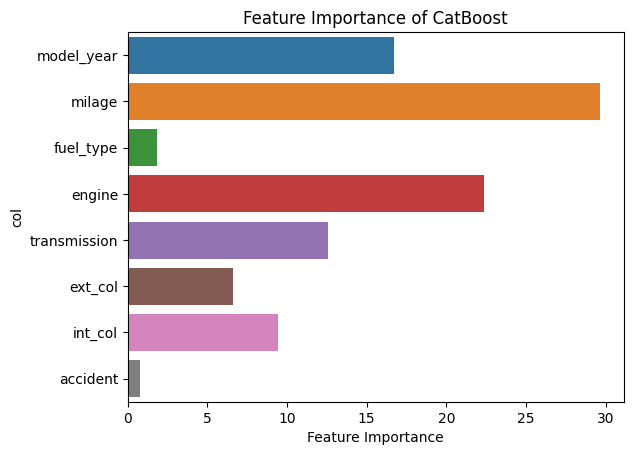

In [53]:
f_i=pd.DataFrame({'col': X.columns, 'Feature Importance': ct.feature_importances_})


sn.barplot(x='Feature Importance', y='col', data=f_i)
plt.title('Feature Importance of CatBoost')
plt.show()

-----

# 2) Test Set

In [61]:
test=pd.read_csv('/kaggle/input/test-x/test.csv')

#### Test dataset first five rows

In [62]:
test.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,54273,Mercedes-Benz,E-Class E 350,2014,73000,Gasoline,302.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,White,Beige,None reported,Yes
1,54274,Lexus,RX 350 Base,2015,128032,Gasoline,275.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,Silver,Black,None reported,Yes
2,54275,Mercedes-Benz,C-Class C 300,2015,51983,Gasoline,241.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Blue,White,None reported,Yes
3,54276,Land,Rover Range Rover 5.0L Supercharged Autobiogra...,2018,29500,Gasoline,518.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,White,At least 1 accident or damage reported,Yes
4,54277,BMW,X6 xDrive40i,2020,90000,Gasoline,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes


#### Test dataset shape

In [63]:
test.shape

(36183, 12)

#### Test dataset information

In [64]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36183 entries, 0 to 36182
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            36183 non-null  int64 
 1   brand         36183 non-null  object
 2   model         36183 non-null  object
 3   model_year    36183 non-null  int64 
 4   milage        36183 non-null  int64 
 5   fuel_type     36183 non-null  object
 6   engine        36183 non-null  object
 7   transmission  36183 non-null  object
 8   ext_col       36183 non-null  object
 9   int_col       36183 non-null  object
 10  accident      36183 non-null  object
 11  clean_title   36183 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.3+ MB


#### Test dataset null values

In [65]:
test.isnull().sum()

id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
dtype: int64

#### Test dataset duplicate values

In [66]:
test.duplicated().sum()

0

#### Test dataset coping for future tasks

In [67]:
test_copy=test.copy()

#### Delete unnecessary columns

In [68]:
test.drop(columns=['id', 'clean_title','brand','model'],axis=1, inplace=True)

In [69]:
test.shape

(36183, 8)

In [70]:
cat_test=test.select_dtypes(include=['object']).columns

cat_test

Index(['fuel_type', 'engine', 'transmission', 'ext_col', 'int_col',
       'accident'],
      dtype='object')

#### label Encoding

In [71]:
for col in cat_test:
    test[col]=lb.fit_transform(test[col])

#### Scaling the test dataset

In [73]:
test=sc.transform(test)

# 3) Kaggle submission

In [115]:
predictions=rf_m.predict(test)

In [116]:
p=pd.DataFrame({'id': test_copy['id'], 'price': predictions})

In [117]:
p

,id,price
0,54273,22929.993250
1,54274,19192.889979
2,54275,31129.306464
3,54276,60241.796021
4,54277,35314.013498
...,...,...
36178,90451,70631.985738
36179,90452,17902.091283
36180,90453,12403.602572
36181,90454,54975.734521


In [118]:
p.to_csv('rf_hy_submission.csv', index=False)

--------

# 4) Hyper Parameter Tuning

In [78]:
from sklearn.model_selection import RandomizedSearchCV

### i) Gradient Boosting 

In [80]:
param_grid={
    'max_depth':[3,5,7],
    'min_samples_leaf':[10,50,100],
    'min_samples_split':[30,150,300],
    'n_estimators':[10,30,50],
    'max_features':['sqrt','log2']
}

In [81]:
gr_model=RandomizedSearchCV(gr,param_grid, cv=5, random_state=123)
gr_model.fit(X_train,Y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(),
                   param_distributions={'max_depth': [3, 5, 7],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [10, 50, 100],
                                        'min_samples_split': [30, 150, 300],
                                        'n_estimators': [10, 30, 50]},
                   random_state=123)

In [82]:
gr_model.best_estimator_

GradientBoostingRegressor(max_depth=7, max_features='sqrt', min_samples_leaf=10,
                          min_samples_split=300, n_estimators=50)

In [83]:
gr_model.best_score_

0.1365672150902124

In [84]:
gr_model.best_params_

{'n_estimators': 50,
 'min_samples_split': 300,
 'min_samples_leaf': 10,
 'max_features': 'sqrt',
 'max_depth': 7}

#### Training the model again after this new parameters.

In [85]:
params={'n_estimators': 50,
 'min_samples_split': 300,
 'min_samples_leaf': 10,
 'max_features': 'sqrt',
 'max_depth': 7}

In [86]:
gr_n_model=GradientBoostingRegressor(**params)
gr_n_model.fit(X_train,Y_train)

GradientBoostingRegressor(max_depth=7, max_features='sqrt', min_samples_leaf=10,
                          min_samples_split=300, n_estimators=50)

In [87]:
report(gr_n_model)

Training Accuracy:  0.2061924857685642
Testting Accuracy:  0.09679250148619434
Mean Absolute Error:  17310.628451943197
Mean Squared Error:  5113481165.052081


-----------

### ii) Light Gradient Boosting

In [96]:
lr_model=RandomizedSearchCV(lg,param_grid, cv=5, random_state=123)
lr_model.fit(X_train,Y_train)

[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=10. Current value: min_data_in_leaf=10
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=10. Current value: min_data_in_leaf=10
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003755 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 845
[LightGBM] [Info] Numbe

RandomizedSearchCV(cv=5, estimator=LGBMRegressor(),
                   param_distributions={'max_depth': [3, 5, 7],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [10, 50, 100],
                                        'min_samples_split': [30, 150, 300],
                                        'n_estimators': [10, 30, 50]},
                   random_state=123)

In [97]:
lr_model.best_estimator_

LGBMRegressor(max_depth=5, max_features='sqrt', min_samples_leaf=50,
              min_samples_split=30, n_estimators=50)

In [98]:
lr_model.best_params_

{'n_estimators': 50,
 'min_samples_split': 30,
 'min_samples_leaf': 50,
 'max_features': 'sqrt',
 'max_depth': 5}

In [99]:
lr_model.best_score_

0.12997826136755292

#### Training the model again after this new parameters.

In [100]:
params={'n_estimators': 50,
 'min_samples_split': 30,
 'min_samples_leaf': 50,
 'max_features': 'sqrt',
 'max_depth': 5}

In [102]:
lg_model_hy=LGBMRegressor(**params)
lg_model_hy.fit(X_train,Y_train)

[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=50. Current value: min_data_in_leaf=50
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=50. Current value: min_data_in_leaf=50
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005034 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 869
[LightGBM] [Info] Numbe

LGBMRegressor(max_depth=5, max_features='sqrt', min_samples_leaf=50,
              min_samples_split=30, n_estimators=50)

In [103]:
report(lg_model_hy)

[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=50. Current value: min_data_in_leaf=50
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=50. Current value: min_data_in_leaf=50
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Training Accuracy:  0.18689292142012426
Testting Accuracy:  0.09402388586417731
Mean Absolute Error:  17295.422072066358
Mean Squared Error:  5129155596.298222


-----------

### iii) Random Forest

In [108]:
rfm_model=RandomizedSearchCV(rf,param_grid, cv=5, random_state=123)
rfm_model.fit(X_train,Y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [3, 5, 7],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [10, 50, 100],
                                        'min_samples_split': [30, 150, 300],
                                        'n_estimators': [10, 30, 50]},
                   random_state=123)

In [109]:
rfm_model.best_estimator_

RandomForestRegressor(max_depth=7, max_features='log2', min_samples_leaf=10,
                      min_samples_split=150, n_estimators=30)

In [110]:
rfm_model.best_params_

{'n_estimators': 30,
 'min_samples_split': 150,
 'min_samples_leaf': 10,
 'max_features': 'log2',
 'max_depth': 7}

In [111]:
rfm_model.best_score_

0.12520769179426752

#### Training the model again after this new parameters.

In [112]:
params={'n_estimators': 30,
 'min_samples_split': 150,
 'min_samples_leaf': 10,
 'max_features': 'log2',
 'max_depth': 7}

In [113]:
rf_m=RandomForestRegressor(**params)
rf_m.fit(X_train,Y_train)

RandomForestRegressor(max_depth=7, max_features='log2', min_samples_leaf=10,
                      min_samples_split=150, n_estimators=30)

In [114]:
report(rf_m)

Training Accuracy:  0.1479253442692665
Testting Accuracy:  0.10087950259943235
Mean Absolute Error:  17185.95302712094
Mean Squared Error:  5090342735.346308


-------

# 5) Saving the model

In [34]:
import pickle

pickle.dump(gr, open('Gradient_Boosting.pkl', 'wb'))
pickle.dump(sc, open('Scaler.pkl', 'wb'))

----------

# 6) Prediction 

### Custom Function

In [36]:
def predict(gr, sc,model_year, milage, fuel_type, engine, transmission,ext_col, int_col, accident):
    
    features=np.array([[model_year, milage, fuel_type, engine, transmission,ext_col, int_col, accident]])
    
    scaled_features=sc.transform(features)
    
    result=gr.predict(scaled_features)
    
    return result[0]

### Test case 1

In [40]:
model_year=2014
milage=73000
fuel_type=2
engine=544
transmission=33
ext_col=220
int_col=8
accident=1

answer=predict(gr, sc,model_year, milage, fuel_type, engine, transmission,ext_col, int_col, accident)
print('The Price of the car is: ')
print(answer)

The Price of the car is: 
23704.763027629255


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


------